<a href="https://colab.research.google.com/github/hajri94/research-project/blob/main/Test_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from numpy import percentile


In [51]:
# We download the excel file
from google.colab import files
uploaded = files.upload()

Saving Test dataframe 10259.xlsx to Test dataframe 10259 (1).xlsx


In [52]:
# Convert the excel file into pandas Dataframe
import io 
df = pd.read_excel(io.BytesIO(uploaded['Test dataframe 10259.xlsx']))
# We round the columns (POWER , Temperature, Irradiation.flux) to one decimal place.
df['Temperature']=df['Temperature'].round(1)
df['Irradiation.flux']=df['Irradiation.flux'].round(1)





In [53]:
# We create multiple POWER lagged columns (we choose 12 lagged dependent variables  ) 
lagged1 = pd.concat([df['POWER'].shift(lag).rename('{}_lag{}'.format(df['POWER'].name, lag)) for lag in range(13)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L1=lagged1.dropna().astype(float)





In [54]:
# We create multiple Temperature lagged columns (we choose 24 lagged independent variables)
lagged2 = pd.concat([df['Temperature'].shift(lag).rename('{}_lag{}'.format(df['Temperature'].name, lag)) for lag in range(25)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L2=lagged2.dropna().astype(float)


In [55]:
# We create multiple Irradiation.flux lagged columns(we choose 24 lagged independent variables)
lagged3 = pd.concat([df['Irradiation.flux'].shift(lag).rename('{}_lag{}'.format(df['Irradiation.flux'].name, lag)) for lag in range(25)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L3=lagged3.dropna().astype(float)



In [56]:
# Maximize the size of Column in google colab 
#(we resize the maximum number of columns in google colab to fit our dataframe)
from google.colab.data_table import DataTable
DataTable.max_columns = 300
# Joining the DataFrame of POWER Lagged Columns to the Dataframe of Temperature Lagged Columns 
# We use the concat function to join 2 dataframes lagged1 (POWER) + lagged2 (Temperature) => Creation of new dataframe called "result".
result = pd.concat([L1,L2], axis=1, join='inner')


In [57]:
#Joining the DataFrame of POWER and Temperature Lagged Columns (POWER+Temperature=> result dataframe) to the Dataframe of Irradiation flux Lagged Columns 
# We use the concat function to join 2 dataframes result (POWER+Temperature) + lagged3 (Irradiation flux)  => Creation of new dataframe called "result1"
result1 = pd.concat([result,L3], axis=1, join='inner')


In [58]:
# We join the "Result1" Dataframe (Power , Temperature, Irradiation flux ) to the original dataframe (the one that we have uploaded from excel)
# we perform this line of code in order to link the two columns (READ_DATE),(Week_Day) to the datframe (result2). 
# The new dataframe need to be more organized as we see some columns that are repeated. 
result2 = pd.concat([result1,df], axis=1, join='inner')
#we remove the columns titled (POWER , Temperature, Irradiation flux)
dk=result2.drop(['POWER', 'Temperature','Irradiation.flux'], axis = 1) 
# To move the Read_Date and Week Date columns to first Position we implement some initial step: 
# First we remove the targeted column "Week_Day" from its intial position in the dataframe.  
first_column = dk.pop('Week_Day')
# Second we insert the removed column "Week_Day" to first position.
dk.insert(0, 'Week_Day', first_column)
# We perform the previous step for the "READ_DATE" column.
second_column = dk.pop('READ_DATE')
dk.insert(0, 'READ_DATE', second_column)


In [59]:
# After creating the new dataframe (called dk), we link it to calendar data table  which is put in an excel file to carry out this step :  
# We download the calendar data excel file
from google.colab import files
uploaded = files.upload()

Saving calendar Data .xlsx to calendar Data  (1).xlsx


In [60]:
# Convert the excel file into Dataframe
import io 
dm = pd.read_excel(io.BytesIO(uploaded['calendar Data .xlsx']))
#In the "Bank Holidays" column we replace the NaN value with zeros.
dm['Bank Holidays'] = dm['Bank Holidays'].fillna(0)
# we remove the "READ_DATE" and "Week_Day" columns to avoid the Repetition of these column when linking it to the dataframe "Dk" 
remove_column = dm.pop('READ_DATE')
remove2_column = dm.pop('Week_Day')


In [ ]:
# we convert the  integers dummy variables (calendar data)  to floats. 
dm[['Tuesday 0h','Tuesday 1h','Tuesday 2h','Tuesday 3h','Tuesday 4h','Tuesday 5h','Tuesday 6h','Tuesday 7h','Tuesday 8h','Tuesday 9h','Tuesday 10h','Tuesday 11h','Tuesday 12h','Tuesday 13h','Tuesday 14h',
        'Tuesday 15h','Tuesday 16h','Tuesday 17h','Tuesday 18h','Tuesday 19h','Tuesday 20h','Tuesday 21h','Tuesday 22h','Tuesday 23h','Wednesday 0h','Wednesday 1h','Wednesday 2h','Wednesday 3h','Wednesday 4h','Wednesday 5h','Wednesday 6h','Wednesday 7h','Wednesday 8h','Wednesday 9h','Wednesday 10h','Wednesday 11h','Wednesday 12h','Wednesday 13h','Wednesday 14h',
        'Wednesday 15h','Wednesday 16h','Wednesday 17h','Wednesday 18h','Wednesday 19h','Wednesday 20h','Wednesday 21h','Wednesday 22h','Wednesday 23h','Thursday 0h','Thursday 1h','Thursday 2h','Thursday 3h','Thursday 4h','Thursday 5h','Thursday 6h','Thursday 7h','Thursday 8h','Thursday 9h','Thursday 10h','Thursday 11h','Thursday 12h','Thursday 13h','Thursday 14h',
        'Thursday 15h','Thursday 16h','Thursday 17h','Thursday 18h','Thursday 19h','Thursday 20h','Thursday 21h','Thursday 22h','Thursday 23h','Friday 0h','Friday 1h','Friday 2h','Friday 3h','Friday 4h','Friday 5h','Friday 6h','Friday 7h','Friday 8h','Friday 9h','Friday 10h','Friday 11h','Friday 12h','Friday 13h','Friday 14h',
        'Friday 15h','Friday 16h','Friday 17h','Friday 18h','Friday 19h','Friday 20h','Friday 21h','Friday 22h','Friday 23h','Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h','Monday 0h','Monday 1h','Monday 2h','Monday 3h','Monday 4h','Monday 5h','Monday 6h','Monday 7h','Monday 8h','Monday 9h','Monday 10h','Monday 11h','Monday 12h','Monday 13h','Monday 14h',
        'Monday 15h','Monday 16h','Monday 17h','Monday 18h','Monday 19h','Monday 20h','Monday 21h','Monday 22h','Monday 23h']]= dm[['Tuesday 0h','Tuesday 1h','Tuesday 2h','Tuesday 3h','Tuesday 4h','Tuesday 5h','Tuesday 6h','Tuesday 7h','Tuesday 8h','Tuesday 9h','Tuesday 10h','Tuesday 11h','Tuesday 12h','Tuesday 13h','Tuesday 14h',
        'Tuesday 15h','Tuesday 16h','Tuesday 17h','Tuesday 18h','Tuesday 19h','Tuesday 20h','Tuesday 21h','Tuesday 22h','Tuesday 23h','Wednesday 0h','Wednesday 1h','Wednesday 2h','Wednesday 3h','Wednesday 4h','Wednesday 5h','Wednesday 6h','Wednesday 7h','Wednesday 8h','Wednesday 9h','Wednesday 10h','Wednesday 11h','Wednesday 12h','Wednesday 13h','Wednesday 14h',
        'Wednesday 15h','Wednesday 16h','Wednesday 17h','Wednesday 18h','Wednesday 19h','Wednesday 20h','Wednesday 21h','Wednesday 22h','Wednesday 23h','Thursday 0h','Thursday 1h','Thursday 2h','Thursday 3h','Thursday 4h','Thursday 5h','Thursday 6h','Thursday 7h','Thursday 8h','Thursday 9h','Thursday 10h','Thursday 11h','Thursday 12h','Thursday 13h','Thursday 14h',
        'Thursday 15h','Thursday 16h','Thursday 17h','Thursday 18h','Thursday 19h','Thursday 20h','Thursday 21h','Thursday 22h','Thursday 23h','Friday 0h','Friday 1h','Friday 2h','Friday 3h','Friday 4h','Friday 5h','Friday 6h','Friday 7h','Friday 8h','Friday 9h','Friday 10h','Friday 11h','Friday 12h','Friday 13h','Friday 14h',
        'Friday 15h','Friday 16h','Friday 17h','Friday 18h','Friday 19h','Friday 20h','Friday 21h','Friday 22h','Friday 23h','Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h','Monday 0h','Monday 1h','Monday 2h','Monday 3h','Monday 4h','Monday 5h','Monday 6h','Monday 7h','Monday 8h','Monday 9h','Monday 10h','Monday 11h','Monday 12h','Monday 13h','Monday 14h',
        'Monday 15h','Monday 16h','Monday 17h','Monday 18h','Monday 19h','Monday 20h','Monday 21h','Monday 22h','Monday 23h']].apply(pd.to_numeric,downcast='float')


dm.dtypes


In [62]:
# we join the calendar data dataframe uploaded from excel file to the dataframe "Dk" 
result3 = pd.concat([dk,dm], axis=1, join='inner')



In [ ]:
#we move the postion of  "Hour_day" column to first position .
column = result3.pop('Hour_day')
result3.insert(0, 'Hour_day', column)
# We drop the nan value from the dataframe
r3=result3.dropna()
r3




In [64]:
# With this code we can perform the filtering of each of the "Hour_day" value.  
HourWeek=result3[result3['Hour_day']== 1]

In [65]:
# after building the first part of the model called ARX model (Autoregressive with exogenous modelling), we perform the model fitting process.
#We begin with:  
#Separation of indeppendent variables and dependent variables

import pandas as pd
import statsmodels.api as sm
X = r3[['POWER_lag1','POWER_lag2','POWER_lag3','POWER_lag4','POWER_lag5','POWER_lag6','POWER_lag7','POWER_lag8','POWER_lag9','POWER_lag10','POWER_lag11','POWER_lag12',
        'Temperature_lag0','Temperature_lag1','Temperature_lag2','Temperature_lag3','Temperature_lag4','Temperature_lag5','Temperature_lag6','Temperature_lag7','Temperature_lag8',
        'Temperature_lag9','Temperature_lag10','Temperature_lag11','Temperature_lag12','Temperature_lag13','Temperature_lag14','Temperature_lag15','Temperature_lag16','Temperature_lag17','Temperature_lag18','Temperature_lag19','Temperature_lag20','Temperature_lag21','Temperature_lag22','Temperature_lag23','Temperature_lag24',
        'Irradiation.flux_lag0','Irradiation.flux_lag1','Irradiation.flux_lag2','Irradiation.flux_lag3','Irradiation.flux_lag4','Irradiation.flux_lag5','Irradiation.flux_lag6','Irradiation.flux_lag7','Irradiation.flux_lag8','Irradiation.flux_lag9','Irradiation.flux_lag10','Irradiation.flux_lag11','Irradiation.flux_lag12','Irradiation.flux_lag13','Irradiation.flux_lag14','Irradiation.flux_lag15','Irradiation.flux_lag16','Irradiation.flux_lag17','Irradiation.flux_lag18','Irradiation.flux_lag19','Irradiation.flux_lag20','Irradiation.flux_lag21','Irradiation.flux_lag22','Irradiation.flux_lag23',
        'Irradiation.flux_lag24','Tuesday 0h','Tuesday 1h','Tuesday 2h','Tuesday 3h','Tuesday 4h','Tuesday 5h','Tuesday 6h','Tuesday 7h','Tuesday 8h','Tuesday 9h','Tuesday 10h','Tuesday 11h','Tuesday 12h','Tuesday 13h','Tuesday 14h',
        'Tuesday 15h','Tuesday 16h','Tuesday 17h','Tuesday 18h','Tuesday 19h','Tuesday 20h','Tuesday 21h','Tuesday 22h','Tuesday 23h','Wednesday 0h','Wednesday 1h','Wednesday 2h','Wednesday 3h','Wednesday 4h','Wednesday 5h','Wednesday 6h','Wednesday 7h','Wednesday 8h','Wednesday 9h','Wednesday 10h','Wednesday 11h','Wednesday 12h','Wednesday 13h','Wednesday 14h',
        'Wednesday 15h','Wednesday 16h','Wednesday 17h','Wednesday 18h','Wednesday 19h','Wednesday 20h','Wednesday 21h','Wednesday 22h','Wednesday 23h','Thursday 0h','Thursday 1h','Thursday 2h','Thursday 3h','Thursday 4h','Thursday 5h','Thursday 6h','Thursday 7h','Thursday 8h','Thursday 9h','Thursday 10h','Thursday 11h','Thursday 12h','Thursday 13h','Thursday 14h',
        'Thursday 15h','Thursday 16h','Thursday 17h','Thursday 18h','Thursday 19h','Thursday 20h','Thursday 21h','Thursday 22h','Thursday 23h','Friday 0h','Friday 1h','Friday 2h','Friday 3h','Friday 4h','Friday 5h','Friday 6h','Friday 7h','Friday 8h','Friday 9h','Friday 10h','Friday 11h','Friday 12h','Friday 13h','Friday 14h',
        'Friday 15h','Friday 16h','Friday 17h','Friday 18h','Friday 19h','Friday 20h','Friday 21h','Friday 22h','Friday 23h','Saturday 0h','Saturday 1h','Saturday 2h','Saturday 3h','Saturday 4h','Saturday 5h','Saturday 6h','Saturday 7h','Saturday 8h','Saturday 9h','Saturday 10h','Saturday 11h','Saturday 12h','Saturday 13h','Saturday 14h',
        'Saturday 15h','Saturday 16h','Saturday 17h','Saturday 18h','Saturday 19h','Saturday 20h','Saturday 21h','Saturday 22h','Saturday 23h','Sunday 0h','Sunday 1h','Sunday 2h','Sunday 3h','Sunday 4h','Sunday 5h','Sunday 6h','Sunday 7h','Sunday 8h','Sunday 9h','Sunday 10h','Sunday 11h','Sunday 12h','Sunday 13h','Sunday 14h',
        'Sunday 15h','Sunday 16h','Sunday 17h','Sunday 18h','Sunday 19h','Sunday 20h','Sunday 21h','Sunday 22h','Sunday 23h','Monday 0h','Monday 1h','Monday 2h','Monday 3h','Monday 4h','Monday 5h','Monday 6h','Monday 7h','Monday 8h','Monday 9h','Monday 10h','Monday 11h','Monday 12h','Monday 13h','Monday 14h',
        'Monday 15h','Monday 16h','Monday 17h','Monday 18h','Monday 19h','Monday 20h','Monday 21h','Monday 22h','Monday 23h','Bank Holidays']] 
Y = r3['POWER_lag0']



In [66]:
# we fit our model using statmodels library 
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
regr = linear_model.LinearRegression()
regr.fit(X, Y)


LinearRegression()

In [ ]:
# with statsmodels we display a comprehensive table with statistical informations.
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)


In [101]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
F=r3.rename(columns={'Tuesday 0h':'Tuesday_0h','Tuesday 1h':'Tuesday_1h','Tuesday 2h':'Tuesday_2h','Tuesday 3h':'Tuesday_3h','Tuesday 4h':'Tuesday_4h','Tuesday 5h':'Tuesday_5h','Tuesday 6h':'Tuesday_6h','Tuesday 7h':'Tuesday_7h','Tuesday 8h':'Tuesday_8h','Tuesday 9h':'Tuesday_9h','Tuesday 10h':'Tuesday_10h','Tuesday 11h':'Tuesday_11h','Tuesday 12h':'Tuesday_12h','Tuesday 13h':'Tuesday_13h','Tuesday 14h':'Tuesday_14h',
        'Tuesday 15h':'Tuesday_15h','Tuesday 16h':'Tuesday_16h','Tuesday 17h':'Tuesday_17h','Tuesday 18h':'Tuesday_18h','Tuesday 19h':'Tuesday_19h','Tuesday 20h':'Tuesday_20h','Tuesday 21h':'Tuesday_21h','Tuesday 22h':'Tuesday_22h','Tuesday 23h':'Tuesday_23h','Wednesday 0h':'Wednesday_0h','Wednesday 1h':'Wednesday_1h','Wednesday 2h':'Wednesday_2h','Wednesday 3h':'Wednesday_3h','Wednesday 4h':'Wednesday_4h','Wednesday 5h':'Wednesday_5h','Wednesday 6h':'Wednesday_6h','Wednesday 7h':'Wednesday_7h','Wednesday 8h':'Wednesday_8h','Wednesday 9h':'Wednesday_9h','Wednesday 10h':'Wednesday_10h','Wednesday 11h':'Wednesday_11h','Wednesday 12h':'Wednesday_12h','Wednesday 13h':'Wednesday_13h','Wednesday 14h':'Wednesday_14h',
        'Wednesday 15h':'Wednesday_15h','Wednesday 16h':'Wednesday_16h','Wednesday 17h':'Wednesday_17h','Wednesday 18h':'Wednesday_18h','Wednesday 19h':'Wednesday_19h','Wednesday 20h':'Wednesday_20h','Wednesday 21h':'Wednesday_21h','Wednesday 22h':'Wednesday_22h','Wednesday 23h':'Wednesday_23h','Thursday 0h':'Thursday_0h','Thursday 1h':'Thursday_1h','Thursday 2h':'Thursday_2h','Thursday 3h':'Thursday_3h','Thursday 4h':'Thursday_4h','Thursday 5h':'Thursday_5h','Thursday 6h':'Thursday_6h','Thursday 7h':'Thursday_7h','Thursday 8h':'Thursday_8h','Thursday 9h':'Thursday_9h','Thursday 10h':'Thursday_10h','Thursday 11h':'Thursday_11h','Thursday 12h':'Thursday_12h','Thursday 13h':'Thursday_13h','Thursday 14h':'Thursday_14h',
        'Thursday 15h':'Thursday_15h','Thursday 16h':'Thursday_16h','Thursday 17h':'Thursday_17h','Thursday 18h':'Thursday_18h','Thursday 19h':'Thursday_19h','Thursday 20h':'Thursday_20h','Thursday 21h':'Thursday_21h','Thursday 22h':'Thursday_22h','Thursday 23h':'Thursday_23','Friday 0h':'Friday_0h','Friday 1h':'Friday_1h','Friday 2h':'Friday_2h','Friday 3h':'Friday_3h','Friday 4h':'Friday_4h','Friday 5h':'Friday_5h','Friday 6h':'Friday_6h','Friday 7h':'Friday_7h','Friday 8h':'Friday_8h','Friday 9h':'Friday_9h','Friday 10h':'Friday_10h','Friday 11h':'Friday_11h','Friday 12h':'Friday_12h','Friday 13h':'Friday_13h','Friday 14h':'Friday_14h',
        'Friday 15h':'Friday_15h','Friday 16h':'Friday_16h','Friday 17h':'Friday_17h','Friday 18h':'Friday_18h','Friday 19h':'Friday_19h','Friday 20h':'Friday_20h','Friday 21h':'Friday_21h','Friday 22h':'Friday_22h','Friday 23h':'Friday_23','Saturday 0h':'Saturday_0h','Saturday 1h':'Saturday_1h','Saturday 2h':'Saturday_2h','Saturday 3h':'Saturday_3h','Saturday 4h':'Saturday_4h','Saturday 5h':'Saturday_5h','Saturday 6h':'Saturday_6h','Saturday 7h':'Saturday_7h','Saturday 8h':'Saturday_8h','Saturday 9h':'Saturday_9h','Saturday 10h':'Saturday_10h','Saturday 11h':'Saturday_11h','Saturday 12h':'Saturday_12h','Saturday 13h':'Saturday_13h','Saturday 14h':'Saturday_14h',
        'Saturday 15h':'Saturday_15h','Saturday 16h':'Saturday_16h','Saturday 17h':'Saturday_17h','Saturday 18h':'Saturday_18h','Friday 19h':'Saturday_19h','Saturday 20h':'Saturday_20h','Saturday 21h':'Saturday_21h','Saturday 22h':'Saturday_22h','Saturday 23h':'Saturday_23','Sunday 0h':'Sunday_0h','Sunday 1h':'Sunday_1h','Sunday 2h':'Sunday_2h','Sunday 3h':'Sunday_3h','Sunday 4h':'Sunday_4h','Sunday 5h':'Sunday_5h','Sunday 6h':'Sunday_6h','Sunday 7h':'Sunday_7h','Sunday 8h':'Sunday_8h','Sunday 9h':'Sunday_9h','Sunday 10h':'Sunday_10h','Sunday 11h':'Sunday_11h','Sunday 12h':'Sunday_12h','Sunday 13h':'Sunday_13h','Sunday 14h':'Sunday_14h',
        'Sunday 15h':'Sunday_15h','Sunday 16h':'Sunday_16h','Sunday 17h':'Sunday_17h','Sunday 18h':'Sunday_18h','Sunday 19h':'Sunday_19h','Sunday 20h':'Sunday_20h','Sunday 21h':'Sunday_21h','Sunday 22h':'Sunday_22h','Sunday 23h':'Sunday_23','Monday 0h':'Monday_0h','Monday 1h':'Monday_1h','Monday 2h':'Monday_2h','Monday 3h':'Monday_3h','Monday 4h':'Monday_4h','Monday 5h':'Monday_5h','Monday 6h':'Monday_6h','Monday 7h':'Monday_7h','Monday 8h':'Monday_8h','Monday 9h':'Monday_9h','Monday 10h':'Monday_10h','Monday 11h':'Monday_11h','Monday 12h':'Monday_12h','Monday 13h':'Monday_13h','Monday 14h':'Monday_14h',
        'Monday 15h':'Monday_15h','Monday 16h':'Monday_16h','Monday 17h':'Monday_17h','Monday 18h':'Monday_18h','Monday 19h':'Monday_19h','Monday 20h':'Monday_20h','Monday 21h':'Monday_21h','Monday 22h':'Monday_22h','Monday 23h':'Monday_23'})
KJB = smf.ols('POWER_lag0 ~ POWER_lag1 + POWER_lag2 + POWER_lag3 + POWER_lag4 + POWER_lag5 + POWER_lag6 +POWER_lag7 + POWER_lag8 + POWER_lag9 + POWER_lag10 + POWER_lag11 + POWER_lag12 + Temperature_lag0 + Temperature_lag1 + Temperature_lag2 + Temperature_lag3 + Temperature_lag4 + Temperature_lag5 + Temperature_lag6 + Temperature_lag7 + Temperature_lag8 + Temperature_lag9 + Temperature_lag10 + Temperature_lag11 + Temperature_lag12 + Temperature_lag13 + Temperature_lag14 + Temperature_lag15 + Temperature_lag16 + Temperature_lag17 + Temperature_lag18 + Temperature_lag19 + Temperature_lag20 + Temperature_lag21 + Temperature_lag22 + Temperature_lag23 + Temperature_lag24',F).fit() 
F['yhat'] = KJB.fittedvalues
F['resid'] = KJB.resid
F['predicted'] = KJB.predict(F)
F.loc[:,'predicted'] =  KJB.predict(F)
F



,Hour_day,READ_DATE,Week_Day,POWER_lag0,POWER_lag1,POWER_lag2,POWER_lag3,POWER_lag4,POWER_lag5,POWER_lag6,...,Monday_18h,Monday_19h,Monday_20h,Monday_21h,Monday_22h,Monday_23,Bank Holidays,yhat,resid,predicted
24,0,2019-01-02 00:00:00,WED,17.70,16.3,17.8,20.5,18.9,17.0,18.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.639972,0.060028,17.639972
25,1,2019-01-02 01:00:00,WED,16.50,17.7,16.3,17.8,20.5,18.9,17.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.377604,-0.877604,17.377604
26,2,2019-01-02 02:00:00,WED,16.80,16.5,17.7,16.3,17.8,20.5,18.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.886378,-0.086378,16.886378
27,3,2019-01-02 03:00:00,WED,17.00,16.8,16.5,17.7,16.3,17.8,20.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.330389,-0.330389,17.330389
28,4,2019-01-02 04:00:00,WED,17.24,17.0,16.8,16.5,17.7,16.3,17.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.659475,-0.419475,17.659475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,2019-12-31 19:00:00,TUE,18.10,18.7,21.3,19.6,16.6,17.7,15.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.165083,-1.065083,19.165083
8756,20,2019-12-31 20:00:00,TUE,17.90,18.1,18.7,21.3,19.6,16.6,17.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.328859,-1.428859,19.328859
8757,21,2019-12-31 21:00:00,TUE,22.40,17.9,18.1,18.7,21.3,19.6,16.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.255771,3.144229,19.255771
8758,22,2019-12-31 22:00:00,TUE,17.50,22.4,17.9,18.1,18.7,21.3,19.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.515046,-3.015046,20.515046


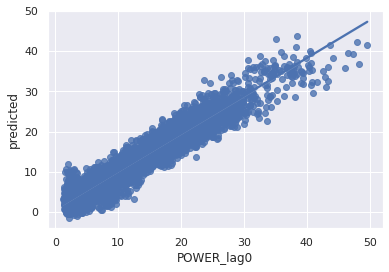

In [96]:
# Model quality plot (Q-Q plot) X : dataset , Y : Predictive data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data=F)

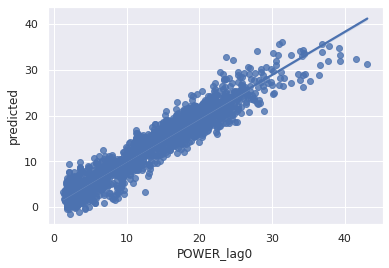

In [90]:
# Weekend plot (Q-Q plot) X : dataset , Y : Predictive data
Weekend= F[(F["Week_Day"]== "SAT")| (F["Week_Day"]== "SUN")]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data=Weekend)

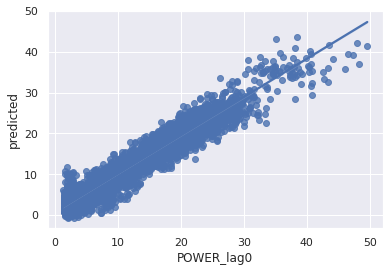

In [104]:
# Weekday plot (Q-Q plot) X : dataset , Y : Predictive data
Weekday= F[(F["Week_Day"]== "MON")| (F["Week_Day"]== "TUE")|(F["Week_Day"]== "WED")|(F["Week_Day"]== "THU")|(F["Week_Day"]== "FRI")]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data=Weekday)

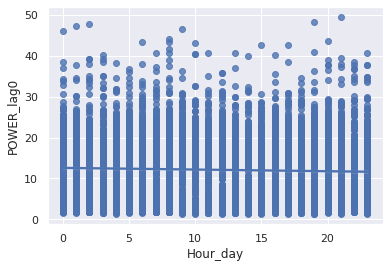

In [116]:
sns.set_theme(color_codes=True)
sns.regplot(x="Hour_day", y="POWER_lag0", data=F)

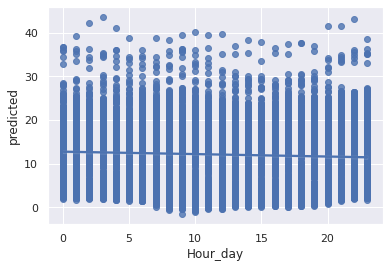

In [117]:
sns.set_theme(color_codes=True)
sns.regplot(x="Hour_day", y="predicted", data=F)

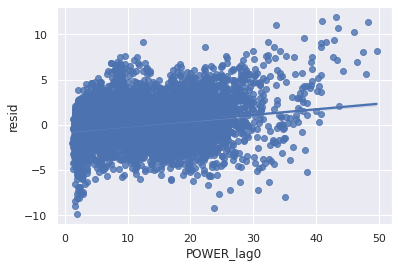

In [118]:
# Residual and Q plot 
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="resid", data=F)